In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
import seaborn as sns

In [2]:
df2 = pd.read_csv(r'A:\Учёба\практика 2 курс\gpu\data_citilink.csv')
df1 = pd.read_csv(r'A:\Учёба\практика 2 курс\gpu\data_eldorado.csv')

In [3]:
df_1 = pd.DataFrame(columns=['num','rating','price', 'class'])
df_2 = pd.DataFrame(columns=['num','rating','price', 'class'])

def levenshtein_distance(str1, str2):
    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  
                matrix[i][j - 1] + 1,  
                matrix[i - 1][j - 1] + cost,  
            )
    return matrix[-1][-1]


for idx, name_1 in enumerate(df1['Название']):
    min_distance = 100
    matched_name = ''
    for name_2 in df2["Название"]:
        distance = levenshtein_distance(name_1, name_2)
        if distance < min_distance:
            min_distance = distance
            matched_name = name_2

    df_1.loc[idx] = [df1['Количество отзывов'][min_distance], df1['Рейтинг'][min_distance], df1['Цена'][min_distance], 1]
    df_2.loc[idx] = [df2['Количество отзывов'][min_distance], df2['Рейтинг'][min_distance], df2['Цена'][min_distance], 2]


In [4]:
df_1.head(100)

,num,rating,price,class
0,2.0,4.0,119999.0,1.0
1,2.0,4.0,119999.0,1.0
2,15.0,4.4,109999.0,1.0
3,4.0,2.2,26500.0,1.0
4,4.0,2.2,26500.0,1.0
...,...,...,...,...
95,6.0,3.0,114999.0,1.0
96,15.0,4.4,109999.0,1.0
97,8.0,2.3,28999.0,1.0
98,12.0,3.3,99999.0,1.0


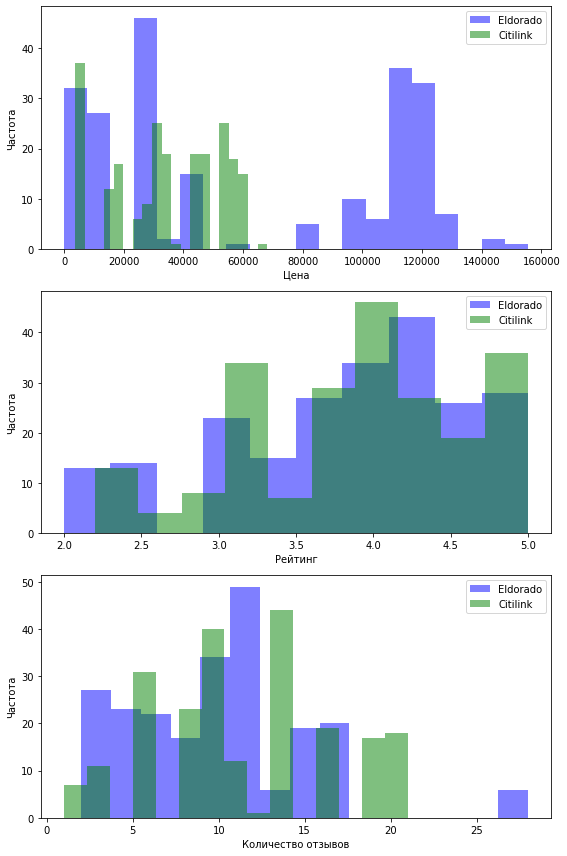

In [5]:
prices1 = df_1['price']
ratings1 = df_1['rating']
reviews1 = df_1['num']

prices2 = df_2['price']
ratings2 = df_2['rating']
reviews2 = df_2['num']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

axes[0].hist(prices1, bins=20, alpha=0.5, color='blue', label='Eldorado')
axes[0].hist(prices2, bins=20, alpha=0.5, color='green', label='Citilink')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')
axes[0].legend()

axes[1].hist(ratings1, bins=10, alpha=0.5, color='blue', label='Eldorado')
axes[1].hist(ratings2, bins=10, alpha=0.5, color='green', label='Citilink')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')
axes[1].legend()

axes[2].hist(reviews1, bins=15, alpha=0.5, color='blue', label='Eldorado')
axes[2].hist(reviews2, bins=15, alpha=0.5, color='green', label='Citilink')
axes[2].set_xlabel('Количество отзывов')
axes[2].set_ylabel('Частота')
axes[2].legend()

plt.tight_layout()
plt.show()


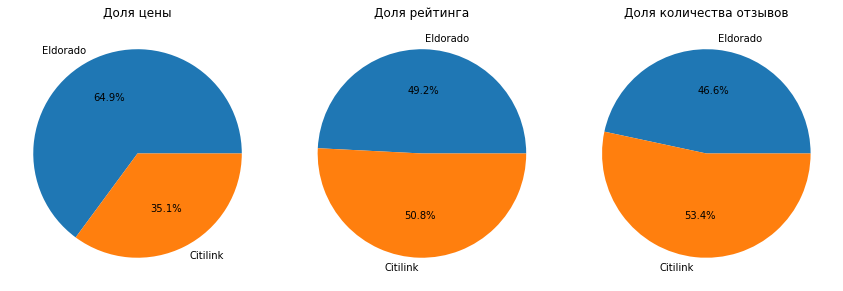

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].pie([prices1.sum(), prices2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[0].set_title('Доля цены')

axes[1].pie([ratings1.mean(), ratings2.mean()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[1].set_title('Доля рейтинга')

axes[2].pie([reviews1.sum(), reviews2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[2].set_title('Доля количества отзывов')

plt.tight_layout()
plt.show()


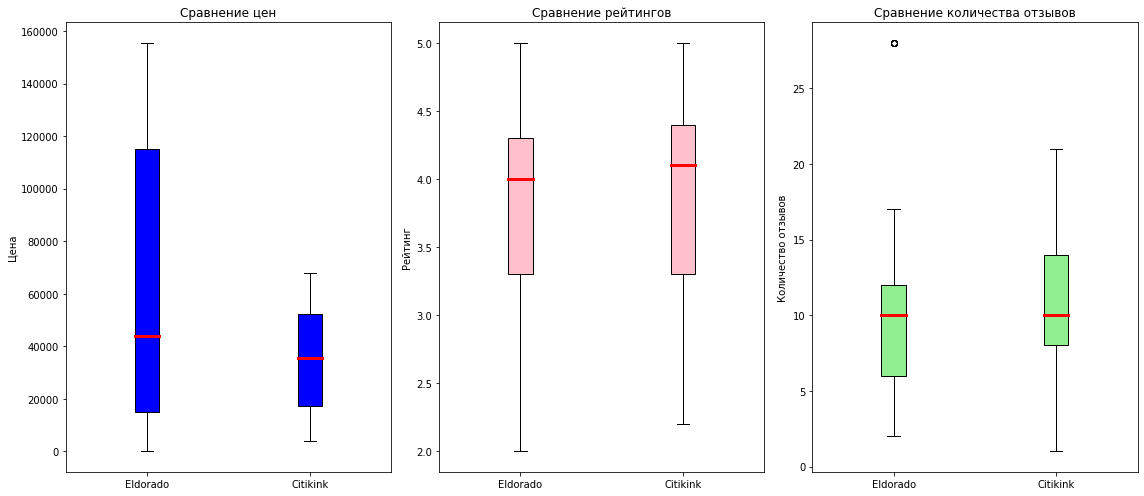

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

axes[0].boxplot([prices1, prices2], patch_artist=True, boxprops=dict(facecolor='blue', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[0].set_xticklabels(['Eldorado', 'Citikink'])
axes[0].set_ylabel('Цена')
axes[0].set_title('Сравнение цен')

axes[1].boxplot([ratings1, ratings2], patch_artist=True, boxprops=dict(facecolor='pink', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[1].set_xticklabels(['Eldorado', 'Citikink'])
axes[1].set_ylabel('Рейтинг')
axes[1].set_title('Сравнение рейтингов')

axes[2].boxplot([reviews1, reviews2], patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[2].set_xticklabels(['Eldorado', 'Citikink'])
axes[2].set_ylabel('Количество отзывов')
axes[2].set_title('Сравнение количества отзывов')

fig.set_size_inches(16, 7)
plt.tight_layout()
plt.show()

Машинно обучение

In [8]:
n_clusters = 5  

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df1.drop(columns='Название'))

cluster_labels = kmeans.labels_

df1['Cluster'] = cluster_labels

In [9]:
df1['Cluster'].unique()

array([1, 3, 0, 2, 4])

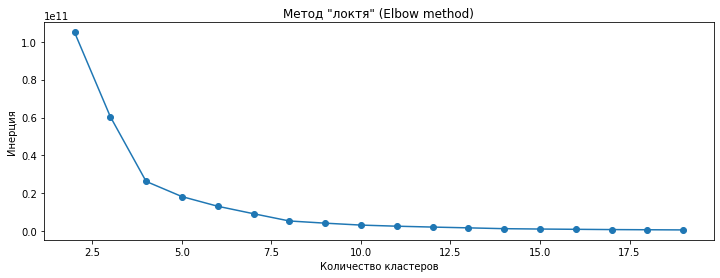

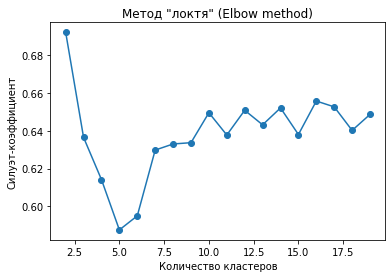

In [10]:
fig, axes = plt.subplots(figsize=(12, 4))

features = df2[['Рейтинг','Цена']]  

inertias = []

silhouette_scores = []

for k in range(2, 20):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)

    
    inertia = kmeans.inertia_
    inertias.append(inertia)

    
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2, 20), inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод "локтя" (Elbow method)')
plt.show()


plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт-коэффициент')
plt.title('Метод "локтя" (Elbow method)')
plt.show()


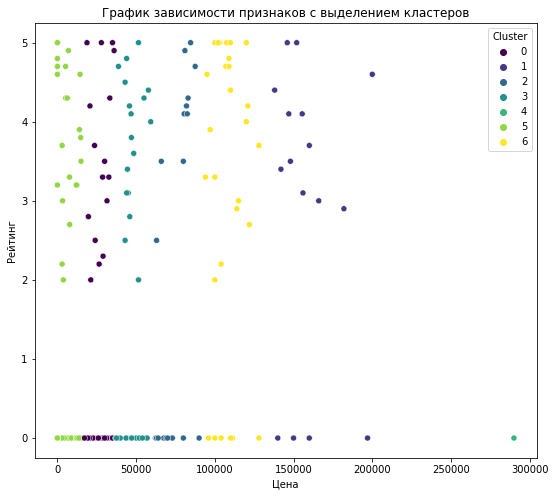

In [11]:
fig, axes = plt.subplots( figsize=(9, 8))
features = df1[['Цена', 'Рейтинг']]
k = 7  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

labels = kmeans.labels_

features_labeled = features.copy()
features_labeled['Cluster'] = labels

sns.scatterplot(x='Цена', y='Рейтинг', hue='Cluster', data=features_labeled, palette='viridis')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.title('График зависимости признаков с выделением кластеров')
plt.show()



In [12]:
df_1 = df1.drop(columns=['Название', 'Cluster'])
df_2 = df1.drop(columns=['Название', 'Cluster'])

In [13]:
def levenshtein_distance(str1, str2): 
    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j

    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  
                matrix[i][j - 1] + 1,  
                matrix[i - 1][j - 1] + cost,  
            )

    return matrix[-1][-1]

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Название                             223 non-null    object 
 1   Цена                                 223 non-null    int64  
 2   Количество отзывов                   223 non-null    float64
 3   Гарантия                             223 non-null    float64
 4   Рейтинг                              223 non-null    float64
 5   Длина                                223 non-null    float64
 6   Количество поддерживаемых мониторов  223 non-null    float64
 7   OverClock                            223 non-null    float64
 8   Рекомендуемая мощность блока         223 non-null    float64
 9   Cluster                              223 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 16.7+ KB


In [15]:
df1.columns

Index(['Название', 'Цена', 'Количество отзывов', 'Гарантия', 'Рейтинг',
       'Длина', 'Количество поддерживаемых мониторов', 'OverClock',
       'Рекомендуемая мощность блока', 'Cluster'],
      dtype='object')

In [16]:
df_1_norm = df1
df_2_norm = df2

columns_to_normalize = ['Количество отзывов', 'Рейтинг', 'Длина',
       'Рекомендуемая мощность блока', 'Гарантия', 'OverClock',
       'Количество поддерживаемых мониторов', 'Цена']

scaler = MinMaxScaler()
df_1_norm[columns_to_normalize] = scaler.fit_transform(df1[columns_to_normalize])
df_2_norm[columns_to_normalize] = scaler.fit_transform(df2[columns_to_normalize])


In [25]:
def find_k_nearest_neighbors(query_object, data, k):
    distances = []
    for i, obj in enumerate(data):
        dist = distance.minkowski(query_object, obj)  
        distances.append((dist, i))  

    distances.sort()
    k_nearest_indices = [index for (_, index) in distances[:k]]
    return k_nearest_indices

df_1 = pd.DataFrame(columns=['num','rating','price', 'class'])
df_2 = pd.DataFrame(columns=['num','rating','price', 'class'])

features_db1 = df_1_norm.drop(columns=['Название', 'Cluster']).values
features_db2 = df_2_norm.drop(columns='Название').values

k = 3  
similar_items = []
for i, item_db1 in enumerate(features_db1):
    k_nearest_indices = find_k_nearest_neighbors(item_db1, features_db2, k)
    distanc = 100
    for o in range(0, 3):
        ans = levenshtein_distance(df1['Название'][i], df2['Название'][k_nearest_indices[o]])
        if ans < distanc:
            distanc = ans
            
    df_1.loc[i] = [df1['Количество отзывов'][distanc], df1['Рейтинг'][distanc], df1['Цена'][distanc], 1]
    df_2.loc[i] = [df2['Количество отзывов'][distanc], df2['Рейтинг'][distanc], df2['Цена'][distanc], 2]



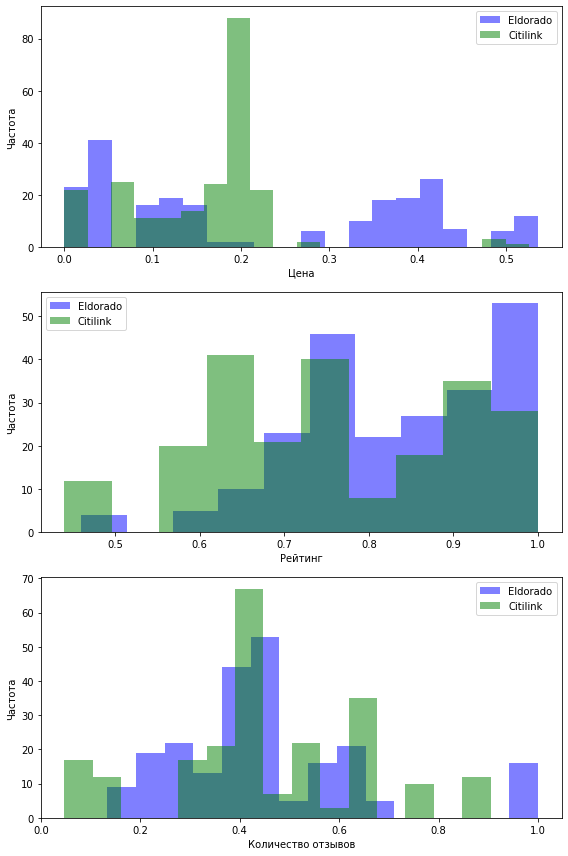

In [26]:
prices1 = df_1['price']
ratings1 = df_1['rating']
reviews1 = df_1['num']

prices2 = df_2['price']
ratings2 = df_2['rating']
reviews2 = df_2['num']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

axes[0].hist(prices1, bins=20, alpha=0.5, color='blue', label='Eldorado')
axes[0].hist(prices2, bins=20, alpha=0.5, color='green', label='Citilink')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')
axes[0].legend()

axes[1].hist(ratings1, bins=10, alpha=0.5, color='blue', label='Eldorado')
axes[1].hist(ratings2, bins=10, alpha=0.5, color='green', label='Citilink')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')
axes[1].legend()

axes[2].hist(reviews1, bins=15, alpha=0.5, color='blue', label='Eldorado')
axes[2].hist(reviews2, bins=15, alpha=0.5, color='green', label='Citilink')
axes[2].set_xlabel('Количество отзывов')
axes[2].set_ylabel('Частота')
axes[2].legend()

plt.tight_layout()
plt.show()

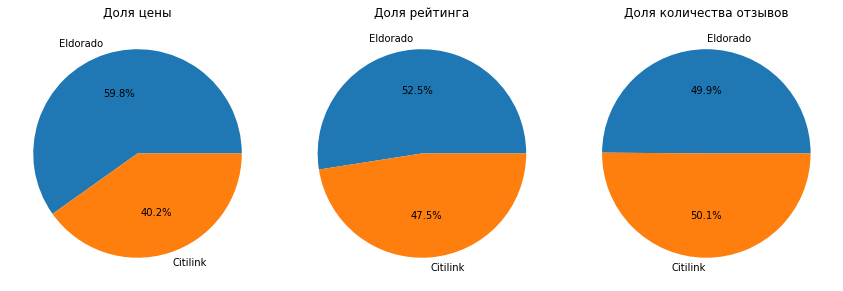

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].pie([prices1.sum(), prices2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[0].set_title('Доля цены')

axes[1].pie([ratings1.mean(), ratings2.mean()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[1].set_title('Доля рейтинга')

axes[2].pie([reviews1.sum(), reviews2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[2].set_title('Доля количества отзывов')

plt.tight_layout()
plt.show()

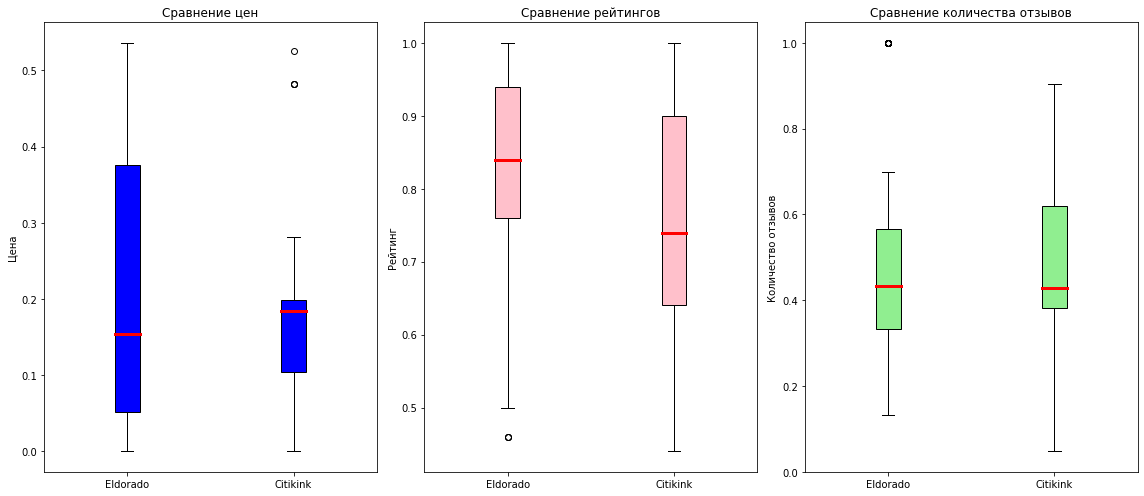

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

axes[0].boxplot([prices1, prices2], patch_artist=True, boxprops=dict(facecolor='blue', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[0].set_xticklabels(['Eldorado', 'Citikink'])
axes[0].set_ylabel('Цена')
axes[0].set_title('Сравнение цен')

axes[1].boxplot([ratings1, ratings2], patch_artist=True, boxprops=dict(facecolor='pink', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[1].set_xticklabels(['Eldorado', 'Citikink'])
axes[1].set_ylabel('Рейтинг')
axes[1].set_title('Сравнение рейтингов')

axes[2].boxplot([reviews1, reviews2], patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[2].set_xticklabels(['Eldorado', 'Citikink'])
axes[2].set_ylabel('Количество отзывов')
axes[2].set_title('Сравнение количества отзывов')

fig.set_size_inches(16, 7)

plt.tight_layout()
plt.show()